<center><h3>Predict The Price of Books</h3></center>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
train = pd.read_excel('/content/Data_Train.xlsx')
train.name = "Train Dataset"
test = pd.read_excel('/content/Data_Test.xlsx')
test.name = "Test Dataset"

In [ ]:
test_temp = test.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

FEATURES:
 - Title: The title of the book
 - Author: The author(s) of the book.
 - Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018)
 - Reviews: The customer reviews about the book
 - Ratings: The customer ratings of the book
 - Synopsis: The synopsis of the book
 - Genre: The genre the book belongs to
 - BookCategory: The department the book is usually available at.
 - Price: The price of the book (Target variable)

>Data Understanding

Train DataSet

In [ ]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [ ]:
train.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [ ]:
train.shape

(6237, 9)

Test Dataset

In [ ]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [ ]:
test.describe()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [ ]:
test.shape

(1560, 8)

`Train DataSet`:

   - we have 9 columns and `6237` entries.
   - `price` is our `target variable`.

`Test Dataset`:

   - We have 8 columns except the target variable and `1560` entries

>Data Cleaning

`Reviews` : extracting review

In [ ]:
train['Reviews'].head()

0    4.0 out of 5 stars
1    3.9 out of 5 stars
2    4.8 out of 5 stars
3    4.1 out of 5 stars
4    5.0 out of 5 stars
Name: Reviews, dtype: object

In [ ]:
train['Reviews'] = train['Reviews'].apply(lambda x: float(x.split()[0]))
test['Reviews'] = test['Reviews'].apply(lambda x: float(x.split()[0]))

In [ ]:
train['Reviews'].head()

0    4.0
1    3.9
2    4.8
3    4.1
4    5.0
Name: Reviews, dtype: float64

`Ratings` : extracting the No. of Ratings

In [ ]:
train['Ratings'].head()

0     8 customer reviews
1    14 customer reviews
2     6 customer reviews
3    13 customer reviews
4      1 customer review
Name: Ratings, dtype: object

In [ ]:
train['Ratings'] = train['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(int)
test['Ratings'] = test['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(int)

In [ ]:
train['Ratings'].head()

0     8
1    14
2     6
3    13
4     1
Name: Ratings, dtype: int64

Extracting year of publish from the `Edition` column

In [ ]:
train['Edition'].head()

0    Paperback,– 10 Mar 2016
1     Paperback,– 7 Nov 2012
2    Paperback,– 25 Feb 1982
3     Paperback,– 5 Oct 2017
4    Hardcover,– 10 Oct 2006
Name: Edition, dtype: object

In [ ]:
train['Edition_Year'] = train['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else np.nan)
test['Edition_Year'] = test['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else np.nan)

In [ ]:
train[['Edition', 'Edition_Year']].sample(5)

,Edition,Edition_Year
2322,"Paperback,– 5 Oct 2017",2017
2024,"Paperback,– 31 Dec 2013",2013
1352,"Paperback,– Import, 15 Jun 2017",2017
2355,"Paperback,– 3 Jun 2010",2010
459,"Paperback,– 21 Apr 2005",2005


Extracting Book_Type from the `Edition` column

In [ ]:
train['Edition'].head()

0    Paperback,– 10 Mar 2016
1     Paperback,– 7 Nov 2012
2    Paperback,– 25 Feb 1982
3     Paperback,– 5 Oct 2017
4    Hardcover,– 10 Oct 2006
Name: Edition, dtype: object

In [ ]:
train['Book_Type'] = train.Edition.str.extract(r'([A-Za-z\s]{0,50})', expand=True)
test['Book_Type'] = test.Edition.str.extract(r'([A-Za-z\s]{0,50})', expand=True)

In [ ]:
train[['Edition', 'Book_Type']].sample(5)

,Edition,Book_Type
1599,"Paperback,– 30 Oct 2008",Paperback
3428,"Paperback,– 30 Jan 2003",Paperback
3856,"Paperback,– 3 Jun 2011",Paperback
5216,"Paperback,– 10 May 2005",Paperback
1039,"Mass Market Paperback,– Import, 3 Jul 2018",Mass Market Paperback


Missing Values

In [ ]:
def missing_values(df):
    M = df.isnull().sum()
    print("Missing values in ",df.name)
    print(M[M>0])

In [ ]:
missing_values(train)
missing_values(test)

Missing values in  Train Dataset
Edition_Year    21
dtype: int64
Missing values in  Test Dataset
Edition_Year    9
dtype: int64


Edition Year has NULL Values.

In [ ]:
check_for_nan1 = train['Edition_Year'].isnull()
check_for_nan2 = test['Edition_Year'].isnull()

In [ ]:
train[check_for_nan1].sample(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year,Book_Type
235,Alfred's Basic Adult All-in-One Course: Lesson...,Willard A. Palmer,"Plastic Comb,– DVD, NTSC",3.9,6,Alfred's Basic Adult All-in-One Course is a gr...,Music Books,"Arts, Film & Photography",1453.0,NaN,Plastic Comb
1558,Figure it out for Yourself,James Hadley Chase,"Hardcover,– Import, Facsimile",5.0,1,Serena Marshland was the fourth richest woman ...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",100.0,NaN,Hardcover
3875,While the Light Lasts (The Agatha Christie Col...,Agatha Christie,"Hardcover,– Facsimile, Import",3.5,7,"The very last Agatha Christie book, including ...",Short Stories (Books),"Crime, Thriller & Mystery",896.0,NaN,Hardcover


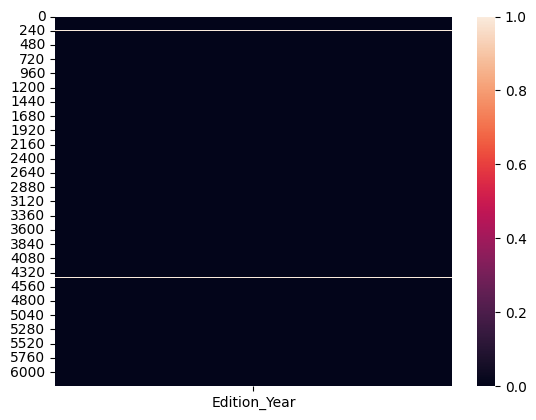

In [ ]:
sns.heatmap(train[['Edition_Year']].isnull());

Number of NULL values in Train Dataset:

In [ ]:
train[check_for_nan1].shape[0]

21

In [ ]:
test[check_for_nan2].sample(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Edition_Year,Book_Type
579,"The Spy Chronicles: RAW, ISI and the Illusion ...",A.S. Dulat,"Hardcover,– Illustrated, Import",3.5,132,Pointing to the horizon where the sea and sky ...,Politics (Books),Politics,NaN,Hardcover
1408,Frank Miller's Sin City Volume 2: A Dame to Ki...,Frank Miller,"Paperback,– Abridged, Audiobook, Box set",5.0,3,The second volume of Frank Miller's signature ...,Science & Mathematics,Humour,NaN,Paperback
178,Gandhi: My Life is My Message,"Jason Quinn, Sachin Nagar","Paperback,– Import, Illustrated",4.0,11,My life is my message. Mohandas Gandhi was a f...,Comics & Mangas (Books),Comics & Mangas,NaN,Paperback


Number of NULL values in Test Dataset:

In [ ]:
test[check_for_nan2].shape[0]

9

In [ ]:
train.groupby("Edition_Year").size().sort_values(ascending=False).head()

Edition_Year
2018    811
2017    757
2016    659
2015    519
2014    402
dtype: int64

In [ ]:
test.groupby("Edition_Year").size().sort_values(ascending=False).head()

Edition_Year
2018    207
2016    176
2017    173
2015    120
2014    101
dtype: int64

Taking the most occuring Year as the filling Value.

In [ ]:
train['Edition_Year'].fillna(value=2018, inplace=True)
test['Edition_Year'].fillna(value=2018, inplace=True)

Use of inplace converts Edition_Year to object.

In [ ]:
train['Edition_Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6237 entries, 0 to 6236
Series name: Edition_Year
Non-Null Count  Dtype 
--------------  ----- 
6237 non-null   object
dtypes: object(1)
memory usage: 48.9+ KB


Converting Edition_Year to int64 data type.

In [ ]:
train['Edition_Year'] = train['Edition_Year'].apply(pd.to_numeric)
test['Edition_Year'] = test['Edition_Year'].apply(pd.to_numeric)

In [ ]:
train['Edition_Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6237 entries, 0 to 6236
Series name: Edition_Year
Non-Null Count  Dtype
--------------  -----
6237 non-null   int64
dtypes: int64(1)
memory usage: 48.9 KB


In [ ]:
check_for_nan1 = train['Edition_Year'].isnull()
check_for_nan2 = test['Edition_Year'].isnull()

In [ ]:
train[check_for_nan1].shape[0]

0

In [ ]:
test[check_for_nan2].shape[0]

0

Book Type has missing values

In [ ]:
m=train['Book_Type']==''

In [ ]:
train[m]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year,Book_Type
2338,English Speaking Course,"Gupta, R.K","(Kannada),Paperback,– 2014",4.2,53,Product Dimensions: 9.4 x 7.2 x 0.7 inches Des...,Language Learning & Teaching (Books),"Language, Linguistics & Writing",93.0,2014,
3291,Learn German With Stories: Momente in München:...,André Klein,"(German),Paperback,– 17 Nov 2014",5.0,2,"In this sequel to ""Karneval in Köln,"" Dino is ...",German,"Language, Linguistics & Writing",557.0,2014,
5180,Larousse Student Dictionary French-English/Eng...,Larousse,"(French),Paperback,– 31 Oct 2010",5.0,1,The Larousse Student Dictionary is designed sp...,Dictionaries,"Language, Linguistics & Writing",657.0,2010,
5866,Collins Easy Learning – Collins Easy Learning ...,Collins,"(Spanish),Paperback,– Import, 7 Jun 2012",5.0,4,Designed to accompany the widely acclaimed Col...,Children's Language Learning (Books),"Language, Linguistics & Writing",295.0,2012,


In [ ]:
train.groupby('Book_Type').size().sort_values(ascending=False).head(2)

Book_Type
Paperback    5193
Hardcover     823
dtype: int64

In [ ]:
train[m]['Book_Type']

2338    
3291    
5180    
5866    
Name: Book_Type, dtype: object

Taking the most occuring Book Type as the filling Value.

In [ ]:
train['Book_Type'] = train['Book_Type'].replace([''], 'Paperback')

In [ ]:
train.groupby('Book_Type').size()

Book_Type
Board book                  1
Cards                       8
Flexibound                 15
Hardcover                 823
Leather Bound               1
Library Binding             1
Loose Leaf                  2
Mass Market Paperback     155
Paperback                5197
Perfect Paperback           1
Plastic Comb                1
Product Bundle              1
Sheet music                24
Spiral                      4
Tankobon Softcover          3
dtype: int64

In [ ]:
train.groupby('Book_Type').size().sort_values()

Book_Type
Board book                  1
Leather Bound               1
Library Binding             1
Perfect Paperback           1
Plastic Comb                1
Product Bundle              1
Loose Leaf                  2
Tankobon Softcover          3
Spiral                      4
Cards                       8
Flexibound                 15
Sheet music                24
Mass Market Paperback     155
Hardcover                 823
Paperback                5197
dtype: int64

No More Missing values in our Dataset.

Standardisation

In [ ]:
def to_lower(df,cols):
    for col in cols:
        df[col] = df[col].str.lower()

In [ ]:
cols = ['Title','Author','Edition','Synopsis','Genre','BookCategory']

#train dataset
to_lower(train,cols)
#teset dataset
to_lower(test,cols)

In [ ]:
train.Genre

0         action & adventure (books)
1         cinema & broadcast (books)
2            international relations
3       contemporary fiction (books)
4              photography textbooks
                    ...             
6232            anthropology (books)
6233    contemporary fiction (books)
6234                 romance (books)
6235      action & adventure (books)
6236      action & adventure (books)
Name: Genre, Length: 6237, dtype: object

In [ ]:
train.Genre = train.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))
test.Genre = test.Genre.apply(lambda x: x.strip('(books)').strip('Textbooks'))

In [ ]:
train.Genre

0          action & adventure 
1          cinema & broadcast 
2       international relation
3        contemporary fiction 
4                 photography 
                 ...          
6232             anthropology 
6233     contemporary fiction 
6234                  romance 
6235       action & adventure 
6236       action & adventure 
Name: Genre, Length: 6237, dtype: object

In [ ]:
train.rename(columns = {'Reviews':'Ratings', 'Ratings':'Reviews'}, inplace = True)
test.rename(columns = {'Reviews':'Ratings', 'Ratings':'Reviews'}, inplace = True)

In [ ]:
train.head(2)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price,Edition_Year,Book_Type
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0,8,the hunters return in their third brilliant no...,action & adventure,action & adventure,220.00,2016,Paperback
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",202.93,2012,Paperback


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Ratings       6237 non-null   float64
 4   Reviews       6237 non-null   int64  
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
 9   Edition_Year  6237 non-null   int64  
 10  Book_Type     6237 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 536.1+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1560 non-null   object 
 1   Author        1560 non-null   object 
 2   Edition       1560 non-null   object 
 3   Ratings       1560 non-null   float64
 4   Reviews       1560 non-null   int64  
 5   Synopsis      1560 non-null   object 
 6   Genre         1560 non-null   object 
 7   BookCategory  1560 non-null   object 
 8   Edition_Year  1560 non-null   int64  
 9   Book_Type     1560 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 122.0+ KB


In [ ]:
train.describe()

,Ratings,Reviews,Price,Edition_Year
count,6237.000000,6237.000000,6237.000000,6237.000000
mean,4.293202,35.984287,560.707516,2011.896585
std,0.662501,149.995031,690.110657,7.916177
min,1.000000,1.000000,25.000000,1900.000000
25%,4.000000,2.000000,249.180000,2010.000000
50%,4.400000,7.000000,373.000000,2015.000000
75%,4.800000,22.000000,599.000000,2017.000000
max,5.000000,6090.000000,14100.000000,2019.000000


#**Exploratory Data Analysis**###

Basic Plots:

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
sns.set_style("darkgrid")

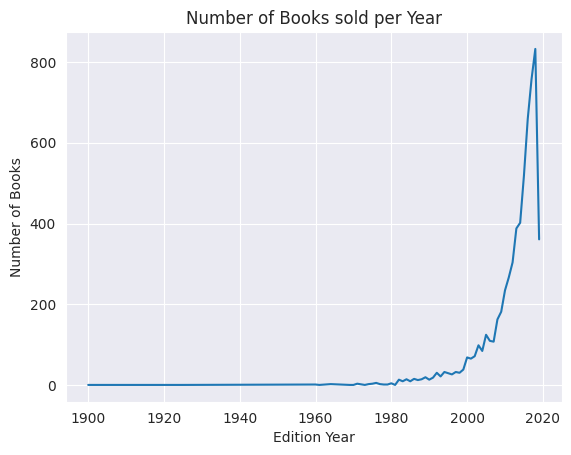

In [ ]:
train.groupby('Edition_Year').size().plot(title='Number of Books sold per Year', xlabel='Edition Year', ylabel='Number of Books');

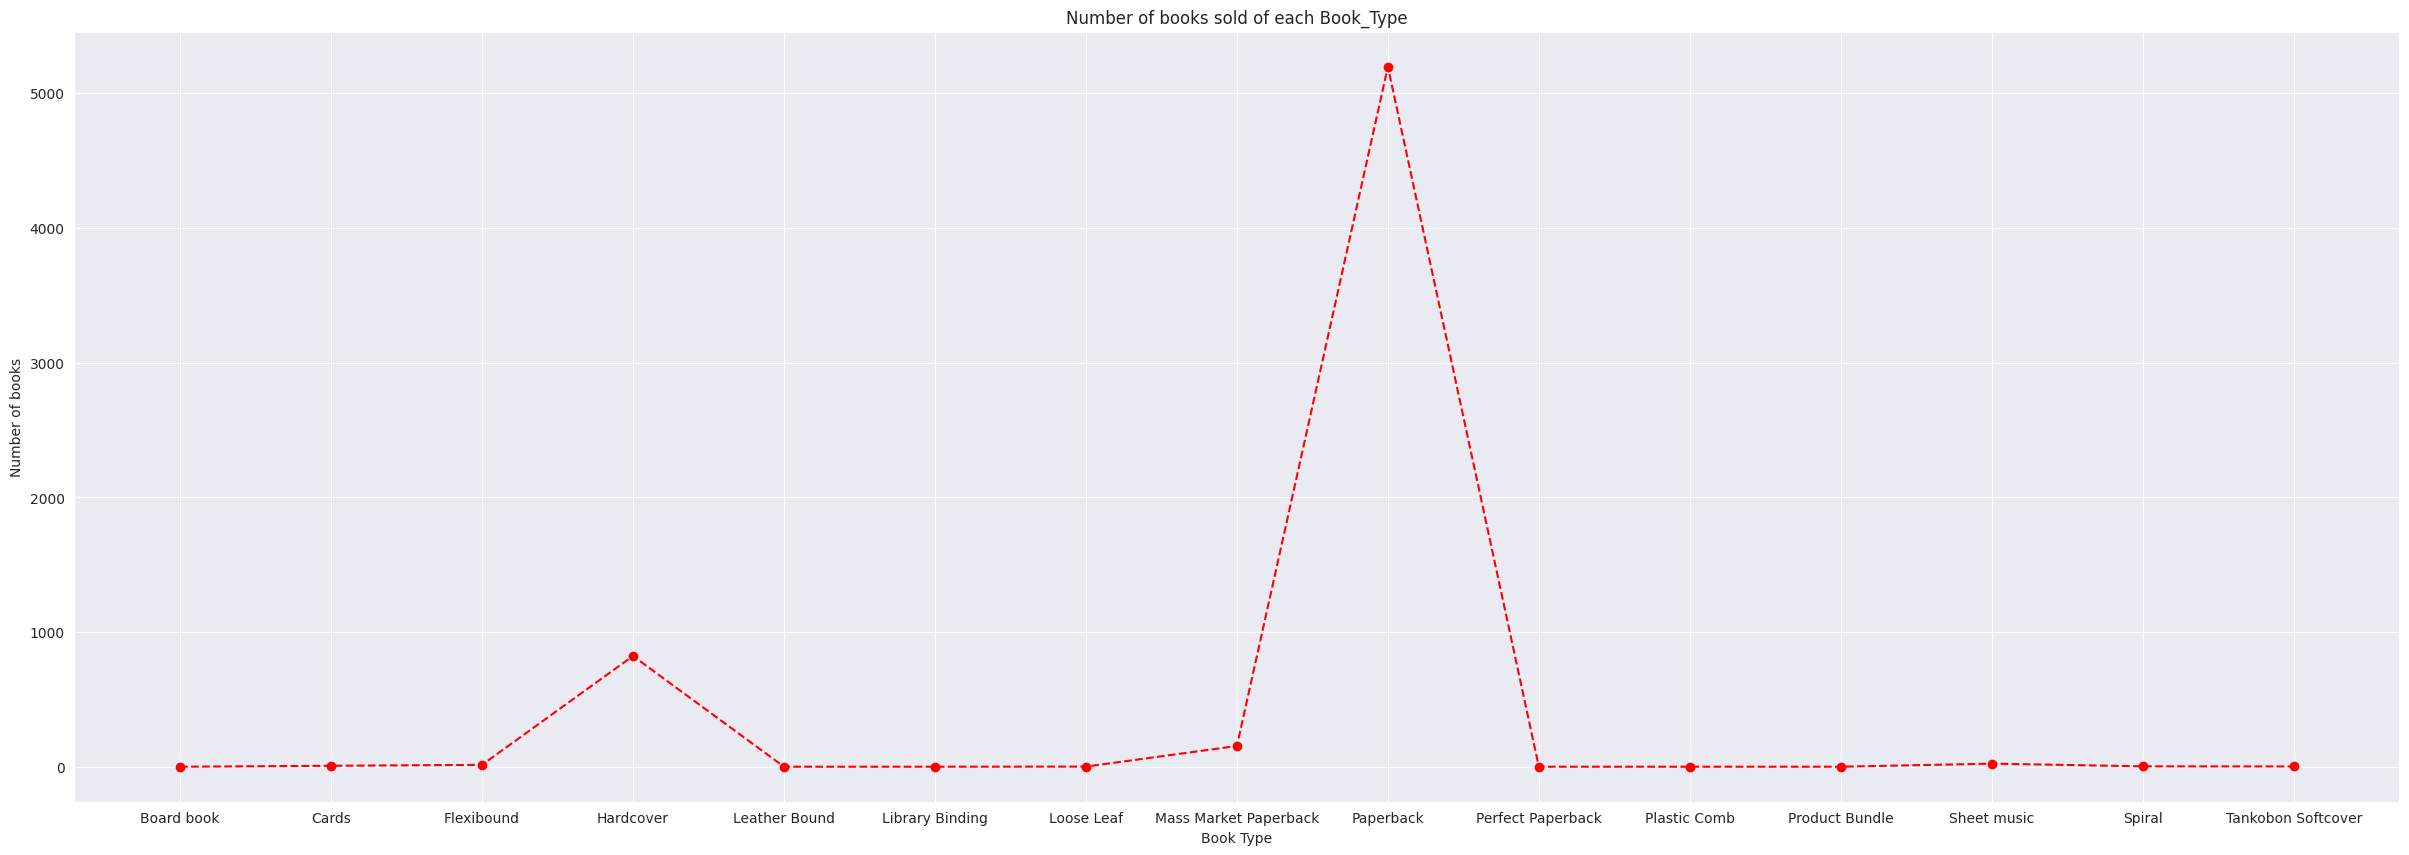

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(train.groupby('Book_Type').size(),'o--r');
plt.xlabel('Book Type')
plt.ylabel('Number of books')
plt.title("Number of books sold of each Book_Type");

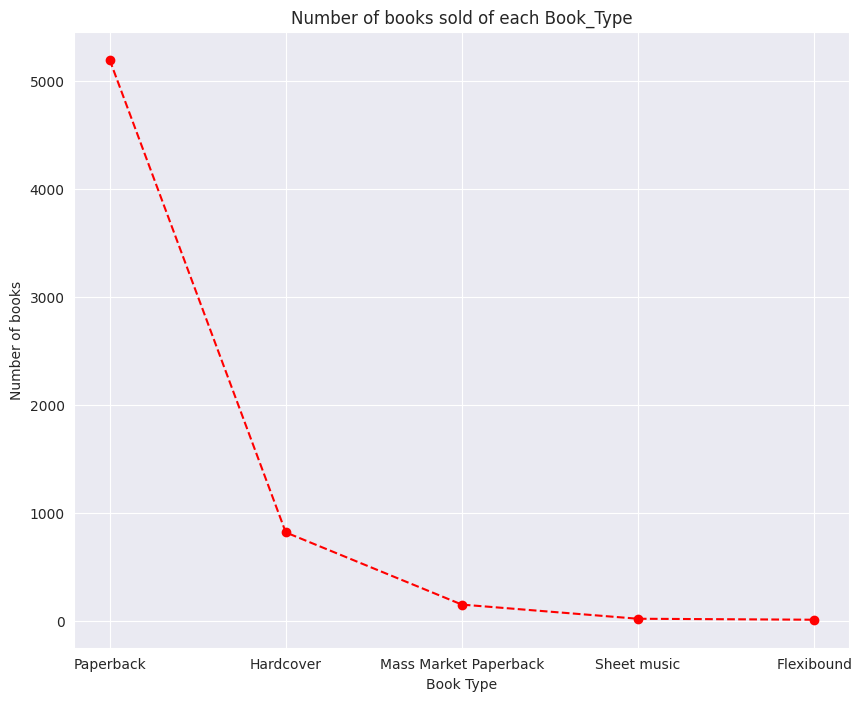

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(train.groupby('Book_Type').size().sort_values(ascending=False).head(5),'o--r');
plt.xlabel('Book Type')
plt.ylabel('Number of books')
plt.title("Number of books sold of each Book_Type");

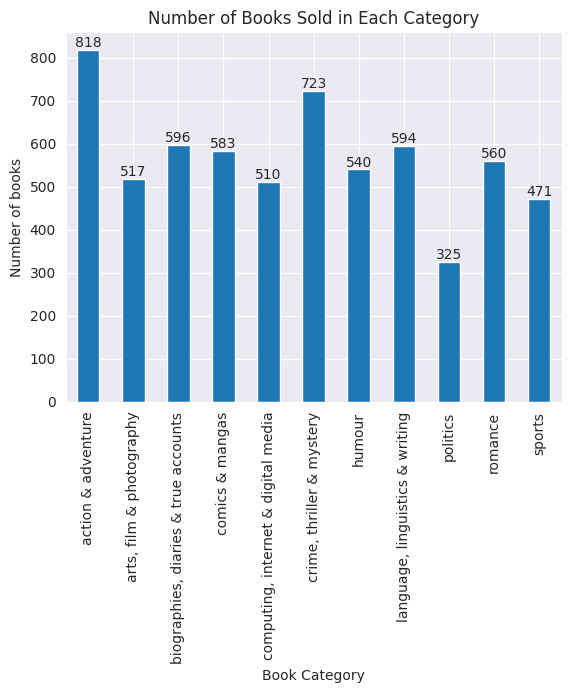

In [ ]:
ax = train.groupby('BookCategory').size().plot(title='Number of Books Sold in Each Category', kind='bar');
plt.xlabel('Book Category')
plt.ylabel('Number of books')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),1)}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
train.groupby('Reviews').size().sort_values()

Reviews
179       1
268       1
270       1
278       1
279       1
       ... 
5       300
4       355
3       491
2       708
1      1040
Length: 342, dtype: int64

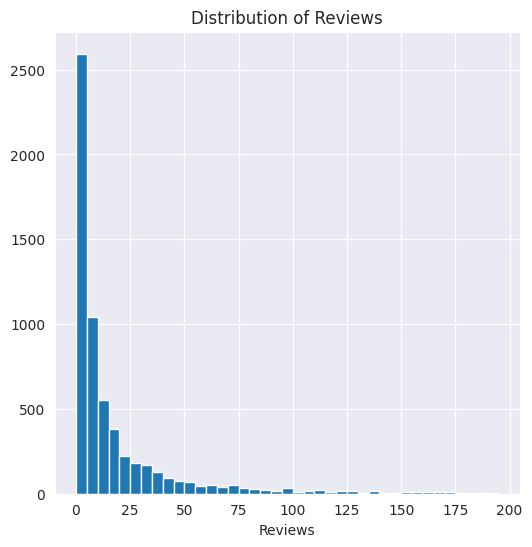

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(train['Reviews'] ,bins=np.arange(0,200,5));
plt.xlabel('Reviews')
plt.title("Distribution of Reviews");

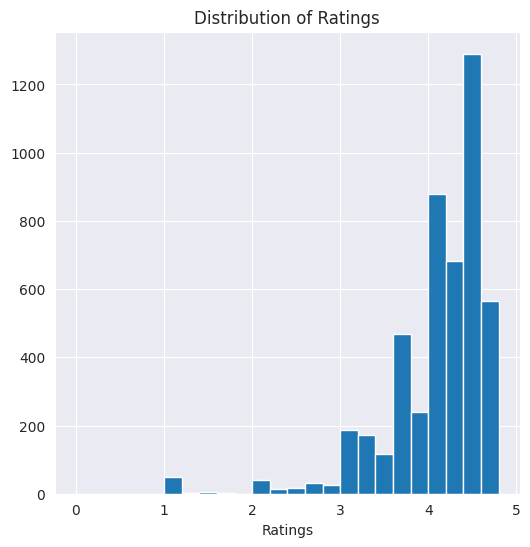

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(train['Ratings'] ,bins=np.arange(0,5,0.2));
plt.xlabel('Ratings')
plt.title("Distribution of Ratings");

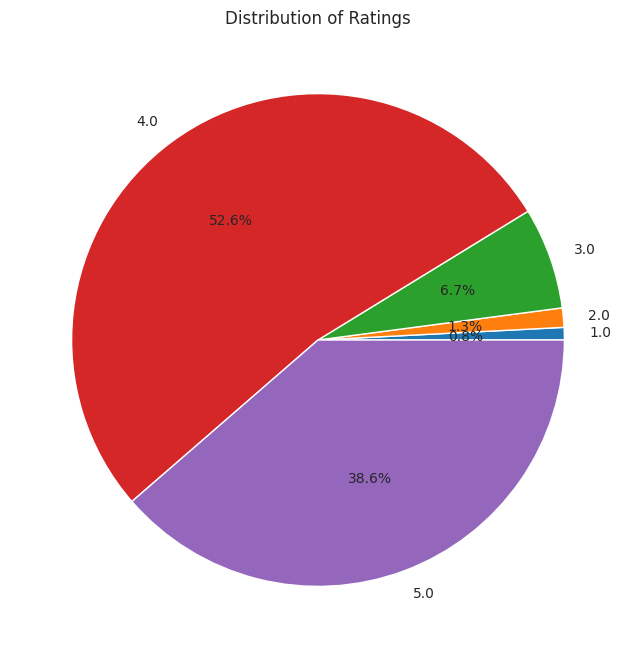

In [ ]:
df2 = train.copy()
df2['Ratings'] = round(df2['Ratings'])
plt.figure(figsize = (8, 8))
df2.groupby('Ratings').size().plot(kind='pie', autopct='%1.1f%%');
plt.title("Distribution of Ratings");

In [ ]:
category_mean = train.groupby('BookCategory')[['Ratings', 'Reviews']].mean()
category_mean

,Ratings,Reviews
BookCategory,,
action & adventure,4.308802,34.649144
"arts, film & photography",4.381044,15.087041
"biographies, diaries & true accounts",4.327517,90.385906
comics & mangas,4.483190,14.370497
"computing, internet & digital media",4.233529,16.982353
"crime, thriller & mystery",4.145643,42.979253
humour,4.349815,17.037037
"language, linguistics & writing",4.175253,41.865320
politics,4.256000,40.046154


In [ ]:
type_mean = train.groupby('Book_Type')[['Ratings', 'Reviews']].mean()
type_mean

,Ratings,Reviews
Book_Type,,
Board book,4.500000,8.000000
Cards,4.637500,4.750000
Flexibound,4.513333,14.133333
Hardcover,4.376549,28.200486
Leather Bound,5.000000,1.000000
Library Binding,4.100000,1227.000000
Loose Leaf,4.500000,7.500000
Mass Market Paperback,4.167097,20.625806
Paperback,4.282490,37.773138


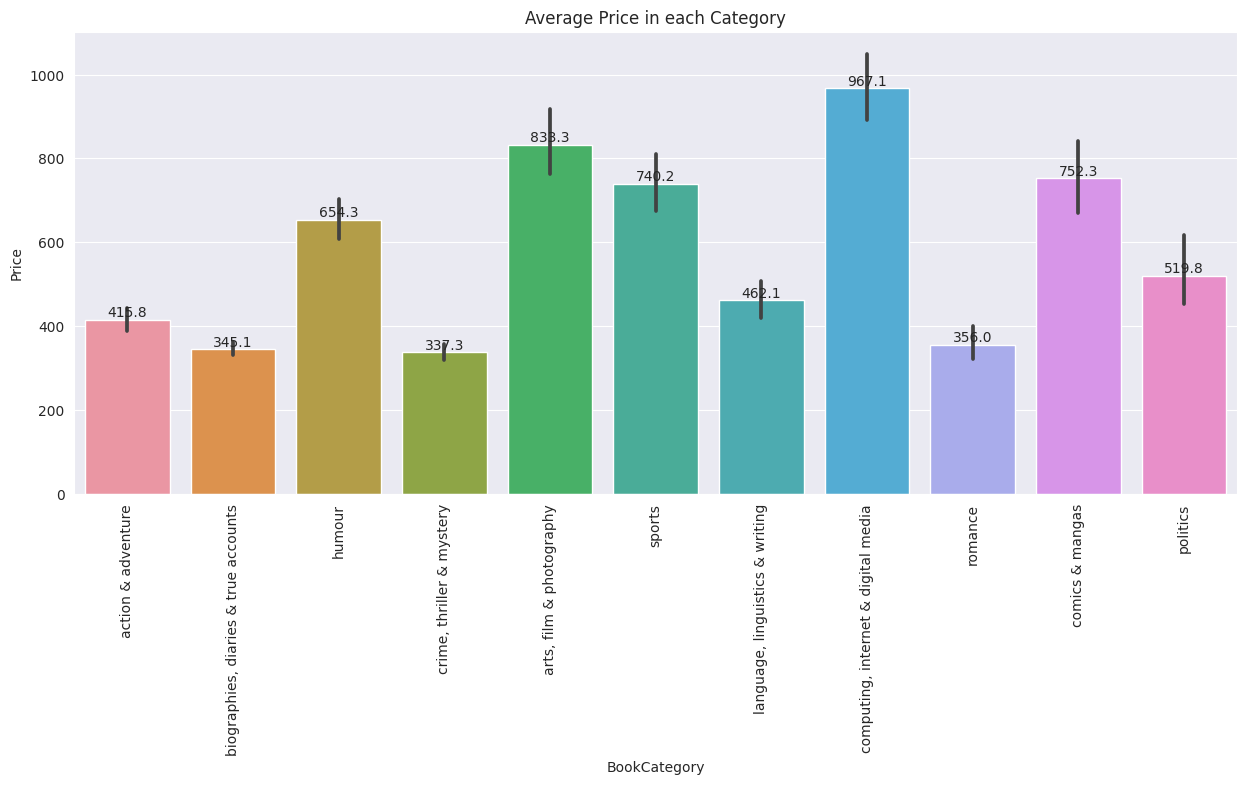

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='BookCategory', y='Price', data=train)
plt.title("Average Price in each Category");
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),1)}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show();

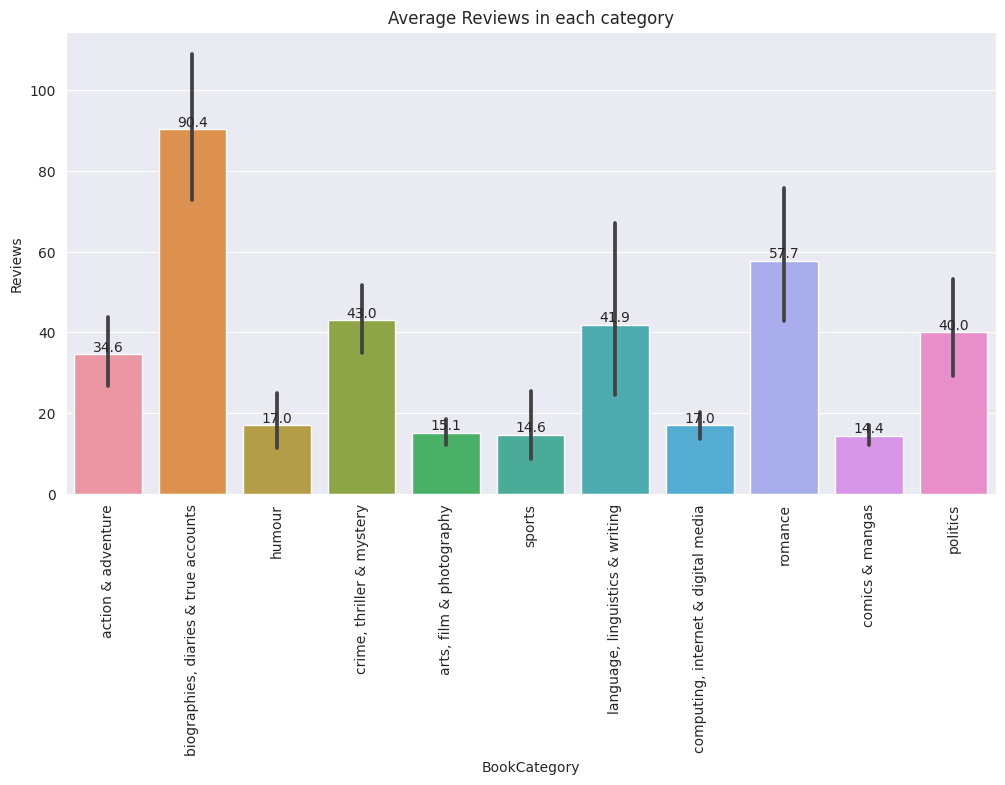

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='BookCategory', y='Reviews', data=train)
plt.title("Average Reviews in each category");
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(),1)}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show();

Converting Multi-index Series to DataFrame:

In [ ]:
temp = train.groupby(['Edition_Year','BookCategory']).size()

test1=temp.to_frame()
test1.rename(columns = {0:'Number'}, inplace = True)

test1.reset_index(inplace=True)

book_df = test1.pivot(index='BookCategory',columns='Edition_Year', values='Number')

book_df.fillna(0, inplace=True)

In [ ]:
test1.columns.tolist()

['Edition_Year', 'BookCategory', 'Number']

In [ ]:
book_df

Edition_Year,1900,1905,1925,1960,1961,1964,1969,1970,1971,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
BookCategory,,,,,,,,,,,,,,,,,,,,,
action & adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,36.0,36.0,35.0,62.0,95.0,65.0,78.0,146.0,48.0
"arts, film & photography",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,22.0,17.0,22.0,32.0,33.0,42.0,38.0,55.0,64.0,18.0
"biographies, diaries & true accounts",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12.0,16.0,38.0,45.0,42.0,58.0,56.0,58.0,89.0,50.0
comics & mangas,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,35.0,45.0,34.0,61.0,39.0,56.0,79.0,52.0,48.0,14.0
"computing, internet & digital media",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,25.0,22.0,27.0,35.0,37.0,87.0,95.0,71.0,18.0
"crime, thriller & mystery",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,29.0,31.0,35.0,35.0,46.0,67.0,145.0,104.0,52.0
humour,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,14.0,18.0,23.0,28.0,28.0,33.0,60.0,61.0,39.0,18.0
"language, linguistics & writing",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,26.0,31.0,31.0,41.0,40.0,40.0,61.0,42.0,60.0,38.0
politics,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,11.0,12.0,15.0,18.0,21.0,26.0,49.0,73.0,33.0


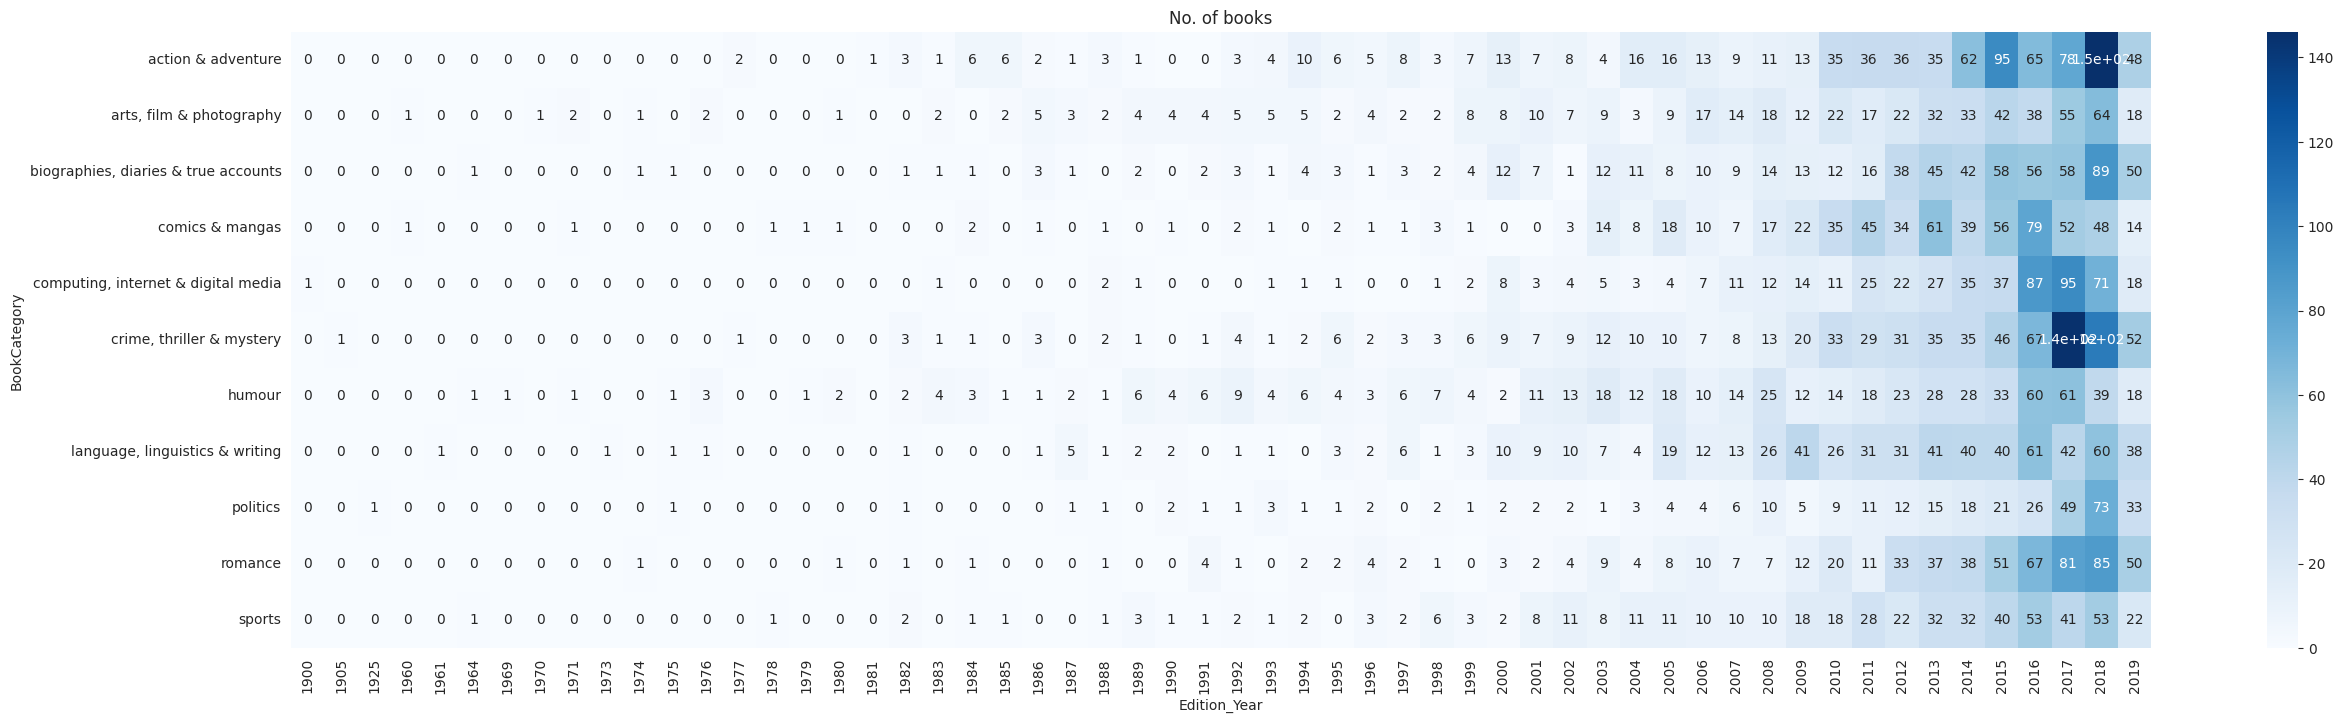

In [ ]:
plt.figure(figsize=(30, 8))
plt.title("No. of books")
sns.heatmap(book_df,annot=True, cmap='Blues');

In [ ]:
temp2 = train.groupby(['Book_Type','BookCategory']).size()

test2=temp2.to_frame()
test2.rename(columns = {0:'Number'}, inplace = True)

test2.reset_index(inplace=True)

book_df2 = test2.pivot(index='BookCategory',columns='Book_Type', values='Number')

book_df2.fillna(0,inplace=True)

In [ ]:
def pred(x):
  for i in range(0, len(x)):
    if(x[i]<0):
       x[i]*=-1
    if(x[i]<25):
       x+=50

In [ ]:
book_df2

Book_Type,Board book,Cards,Flexibound,Hardcover,Leather Bound,Library Binding,Loose Leaf,Mass Market Paperback,Paperback,Perfect Paperback,Plastic Comb,Product Bundle,Sheet music,Spiral,Tankobon Softcover
BookCategory,,,,,,,,,,,,,,,
action & adventure,1.0,0.0,0.0,84.0,1.0,0.0,0.0,45.0,687.0,0.0,0.0,0.0,0.0,0.0,0.0
"arts, film & photography",0.0,0.0,2.0,102.0,0.0,0.0,2.0,5.0,380.0,0.0,1.0,0.0,23.0,2.0,0.0
"biographies, diaries & true accounts",0.0,0.0,1.0,104.0,0.0,1.0,0.0,9.0,480.0,1.0,0.0,0.0,0.0,0.0,0.0
comics & mangas,0.0,0.0,0.0,107.0,0.0,0.0,0.0,2.0,473.0,0.0,0.0,1.0,0.0,0.0,0.0
"computing, internet & digital media",0.0,0.0,2.0,50.0,0.0,0.0,0.0,0.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0
"crime, thriller & mystery",0.0,0.0,0.0,33.0,0.0,0.0,0.0,22.0,667.0,0.0,0.0,0.0,0.0,0.0,1.0
humour,0.0,3.0,1.0,109.0,0.0,0.0,0.0,12.0,412.0,0.0,0.0,0.0,1.0,2.0,0.0
"language, linguistics & writing",0.0,4.0,7.0,64.0,0.0,0.0,0.0,14.0,504.0,0.0,0.0,0.0,0.0,0.0,1.0
politics,0.0,0.0,0.0,84.0,0.0,0.0,0.0,1.0,239.0,0.0,0.0,0.0,0.0,0.0,1.0


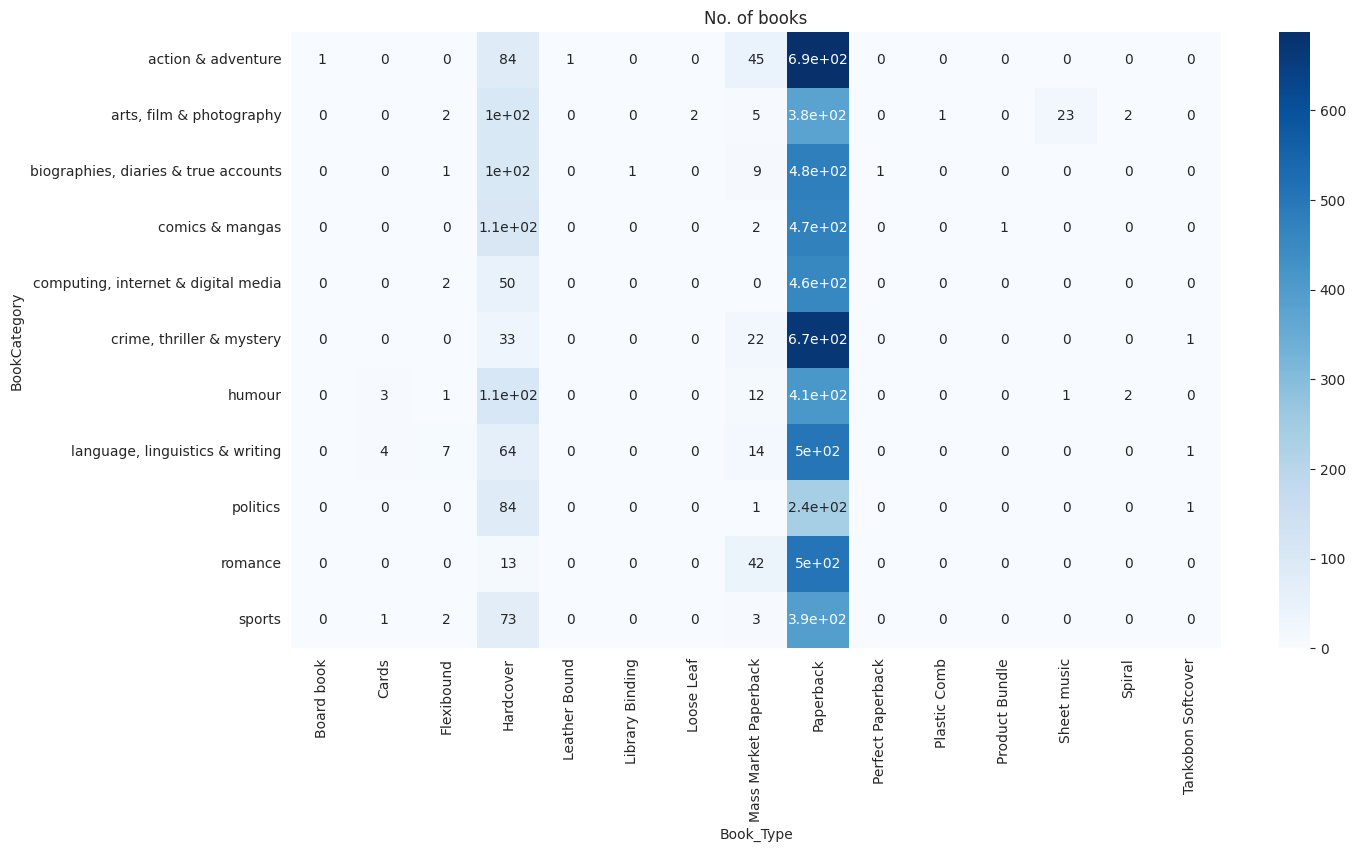

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("No. of books")
sns.heatmap(book_df2,annot=True, cmap='Blues');

# Detecting outlier using IQR [Inter Quartile Range]:

# InterQuantile Range
75%- 25% values in a dataset

### Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [ ]:
price = train['Price'].sort_values()

In [ ]:
price

418        25.00
5068       25.00
2079       28.00
1210       30.00
4000       30.00
          ...   
2560     9096.00
2818     9984.00
2607    11715.12
886     13244.67
2455    14100.00
Name: Price, Length: 6237, dtype: float64

In [ ]:
quartile1, quartile3 = np.percentile(price, [25, 75])

In [ ]:
print(quartile1, quartile3)

249.18 599.0


# Finding IQR

In [ ]:
iqr_value=quartile3-quartile1
print(iqr_value)

349.82


In [ ]:
## Find the lower bound value and the higher bound value

lower_bound_val = quartile1 -(1.5 * iqr_value)
upper_bound_val = quartile3 +(1.5 * iqr_value)

In [ ]:
print(lower_bound_val,upper_bound_val)

-275.55 1123.73


In [ ]:
mask=(price > 1123.73)

In [ ]:
price[mask]

4288     1124.00
4083     1125.00
4078     1125.09
4486     1128.00
4275     1128.00
          ...   
2560     9096.00
2818     9984.00
2607    11715.12
886     13244.67
2455    14100.00
Name: Price, Length: 597, dtype: float64

<Axes: xlabel='Price'>

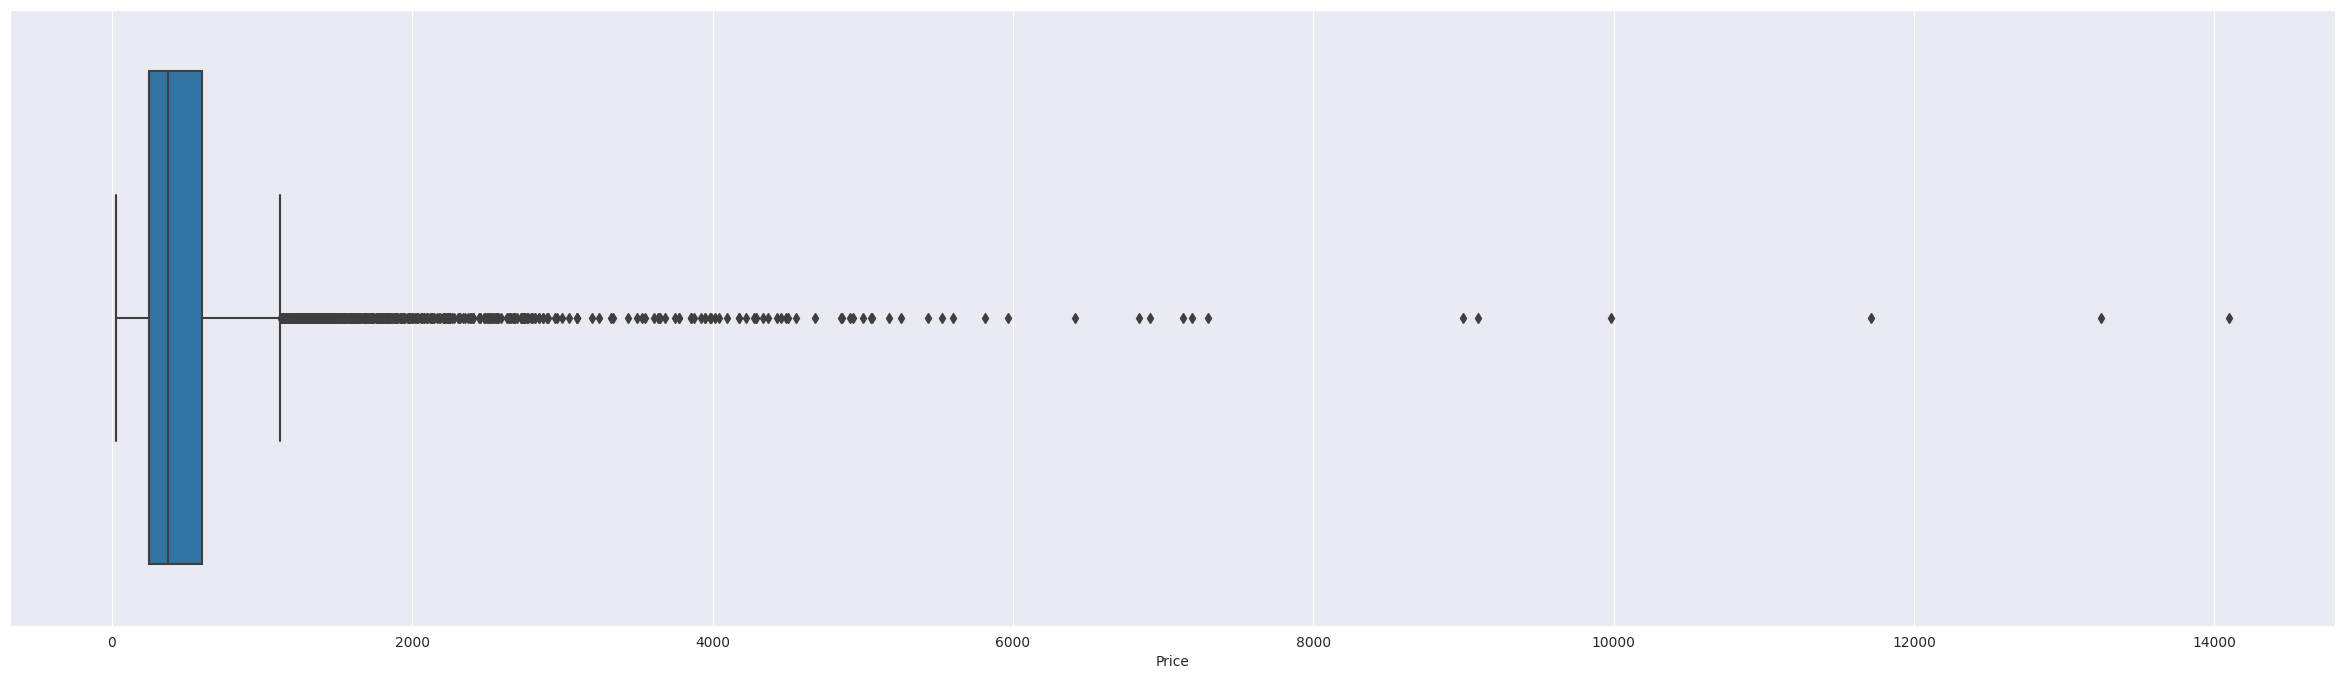

In [ ]:
fig = plt.figure(figsize =(30, 8))
sns.boxplot(x='Price', data=train)

In [ ]:
outliers=[]
def detect_outliers(data):

    threshold=3
    mean = np.mean(data)
    std =np.std(data)


    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [ ]:
len(detect_outliers(price))

111

Resolving Outliers using tenth_percentile and ninetieth_percentile

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(price, 10)
ninetieth_percentile = np.percentile(price, 90)
print( tenth_percentile , ninetieth_percentile )

166.252 1088.8220000000047


In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(price, 10)
ninetieth_percentile = np.percentile(price, 90)
# print(tenth_percentile, ninetieth_percentile)
b = np.where (price < tenth_percentile, tenth_percentile, price)
b = np.where (b > ninetieth_percentile, ninetieth_percentile, b)

In [ ]:
b

array([ 166.252,  166.252,  166.252, ..., 1088.822, 1088.822, 1088.822])

<Axes: >

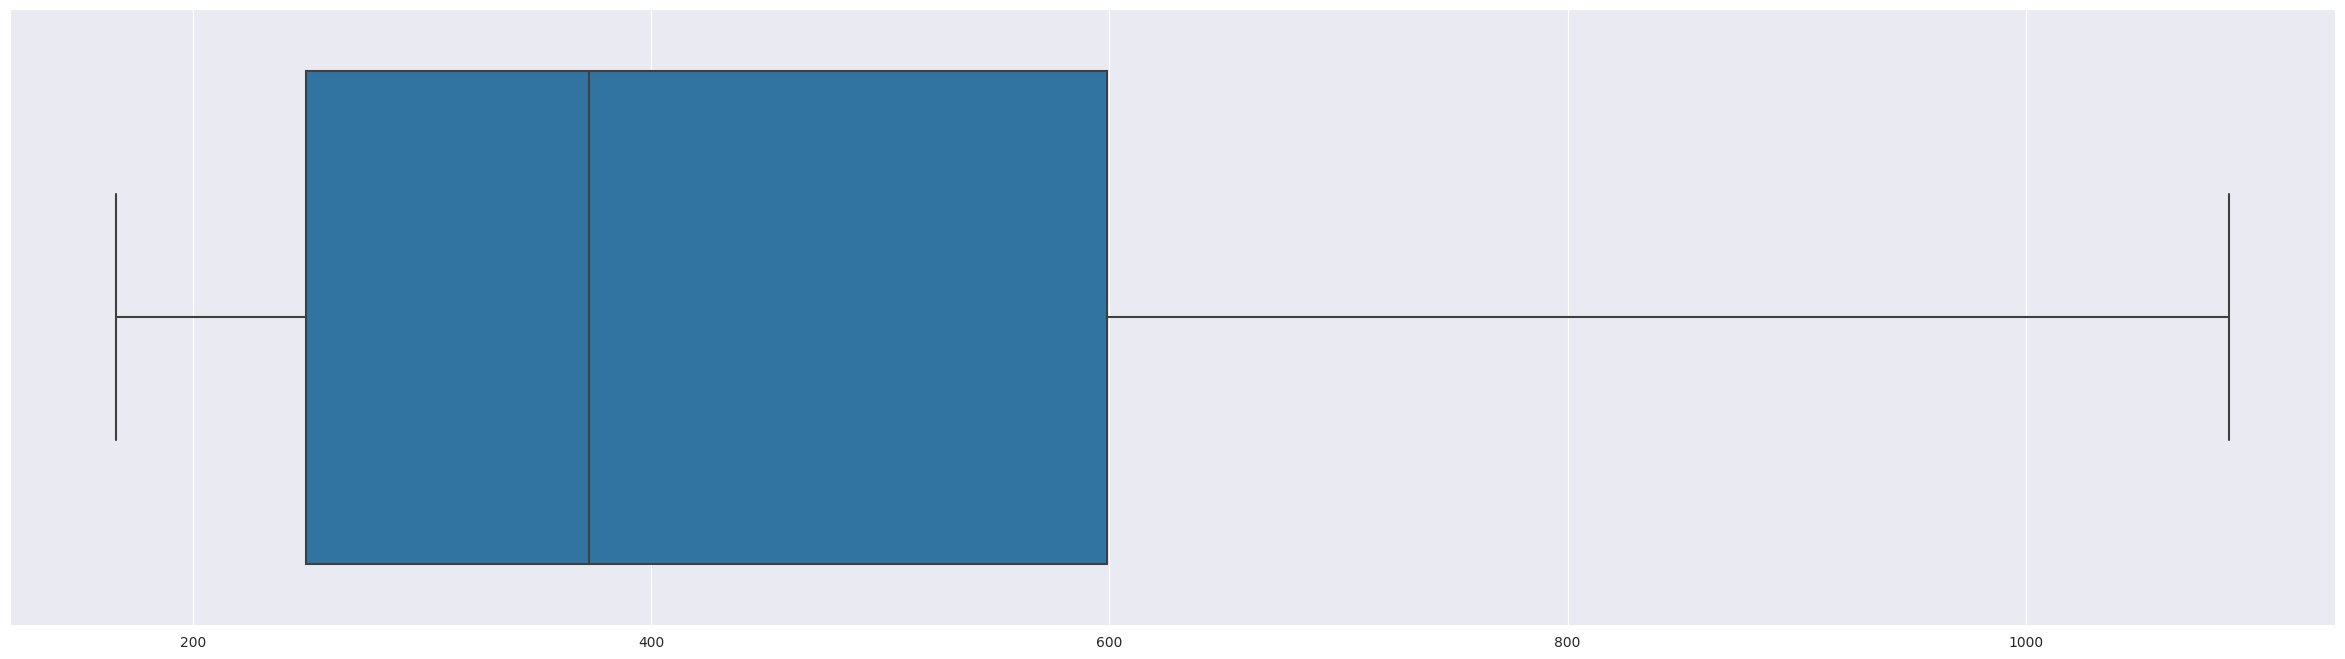

In [ ]:
fig = plt.figure(figsize =(30, 8))
sns.boxplot(x=b)

In [ ]:
#train['Price'] = b

In [ ]:
data1= pd.get_dummies(train, columns= ['BookCategory'])
data1.head(5)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,Edition_Year,Book_Type,...,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0,8,the hunters return in their third brilliant no...,action & adventure,220.00,2016,Paperback,...,0,0,0,0,0,0,0,0,0,0
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,202.93,2012,Paperback,...,0,1,0,0,0,0,0,0,0,0
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",4.8,6,"""during the time men live without a common pow...",international relation,299.00,1982,Paperback,...,0,0,0,0,0,1,0,0,0,0
3,a pocket full of rye (miss marple),agatha christie,"paperback,– 5 oct 2017",4.1,13,a handful of grain is found in the pocket of a...,contemporary fiction,180.00,2017,Paperback,...,0,0,0,0,1,0,0,0,0,0
4,life 70 years of extraordinary photography,editors of life,"hardcover,– 10 oct 2006",5.0,1,"for seven decades, ""life"" has been thrilling t...",photography,965.62,2006,Hardcover,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
data2 = data1.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)
data2.head()

<ipython-input-99-43e6e6720da6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data1.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)


,Ratings,Reviews,Price,Edition_Year,Book_Type,BookCategory_action & adventure,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,4.0,8,220.00,2016,Paperback,1,0,0,0,0,0,0,0,0,0,0
1,3.9,14,202.93,2012,Paperback,0,0,1,0,0,0,0,0,0,0,0
2,4.8,6,299.00,1982,Paperback,0,0,0,0,0,0,1,0,0,0,0
3,4.1,13,180.00,2017,Paperback,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1,965.62,2006,Hardcover,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
data2.describe()

,Ratings,Reviews,Price,Edition_Year,BookCategory_action & adventure,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,4.293202,35.984287,560.707516,2011.896585,0.131153,0.082892,0.095559,0.093474,0.081770,0.115921,0.086580,0.095238,0.052108,0.089787,0.075517
std,0.662501,149.995031,690.110657,7.916177,0.337594,0.275742,0.294009,0.291119,0.274036,0.320156,0.281241,0.293567,0.222263,0.285899,0.264245
min,1.000000,1.000000,25.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,249.180000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000,7.000000,373.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.800000,22.000000,599.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,6090.000000,14100.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
temp5=data2.copy()
temp5.head()

,Ratings,Reviews,Price,Edition_Year,Book_Type,BookCategory_action & adventure,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,4.0,8,220.00,2016,Paperback,1,0,0,0,0,0,0,0,0,0,0
1,3.9,14,202.93,2012,Paperback,0,0,1,0,0,0,0,0,0,0,0
2,4.8,6,299.00,1982,Paperback,0,0,0,0,0,0,1,0,0,0,0
3,4.1,13,180.00,2017,Paperback,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1,965.62,2006,Hardcover,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
temp5.drop(['Reviews','Ratings','Edition_Year','Book_Type'],1)

<ipython-input-102-61eca60d972d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  temp5.drop(['Reviews','Ratings','Edition_Year','Book_Type'],1)


,Price,BookCategory_action & adventure,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,220.00,1,0,0,0,0,0,0,0,0,0,0
1,202.93,0,0,1,0,0,0,0,0,0,0,0
2,299.00,0,0,0,0,0,0,1,0,0,0,0
3,180.00,0,0,0,0,0,1,0,0,0,0,0
4,965.62,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,322.00,0,0,0,0,0,0,1,0,0,0,0
6233,421.00,0,0,0,0,0,1,0,0,0,0,0
6234,399.00,0,0,0,0,0,0,0,0,0,1,0
6235,319.00,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
plist = list(temp5['Price'])

def pricesum(col):
  sum = 0
  c=0
  clist = list(temp5[col])
  ziplist = zip(plist, clist)
  ziplist = list(ziplist)
  for i in ziplist:
    if i[1] == 1:
      sum += i[0]
      c+=1
  return (sum,c)

In [ ]:
coumnlist=temp5.columns
coumnlist
l=len(coumnlist)
for i in range(1,l):
  print(pricesum(coumnlist[i]))

(802874.7299999999, 1040)
(0, 0)
(0, 0)
(0, 0)
(340133.3200000001, 818)
(430798.5999999999, 517)
(205705.05, 596)
(438609.11, 583)
(493210.24999999994, 510)
(243895.08, 723)
(353322.3100000002, 540)
(274496.82, 594)
(168933.09, 325)
(199374.37000000002, 560)
(348654.7800000001, 471)


In [ ]:
data2.skew()

<ipython-input-105-7bae44539962>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.skew()


Ratings                                              -1.646196
Reviews                                              17.662794
Price                                                 6.749866
Edition_Year                                         -2.941073
BookCategory_action & adventure                       2.185851
BookCategory_arts, film & photography                 3.026321
BookCategory_biographies, diaries & true accounts     2.752102
BookCategory_comics & mangas                          2.793739
BookCategory_computing, internet & digital media      3.053350
BookCategory_crime, thriller & mystery                2.400093
BookCategory_humour                                   2.940909
BookCategory_language, linguistics & writing          2.758428
BookCategory_politics                                 4.031570
BookCategory_romance                                  2.870559
BookCategory_sports                                   3.213828
dtype: float64


Skewness of price :  6.749865573718627


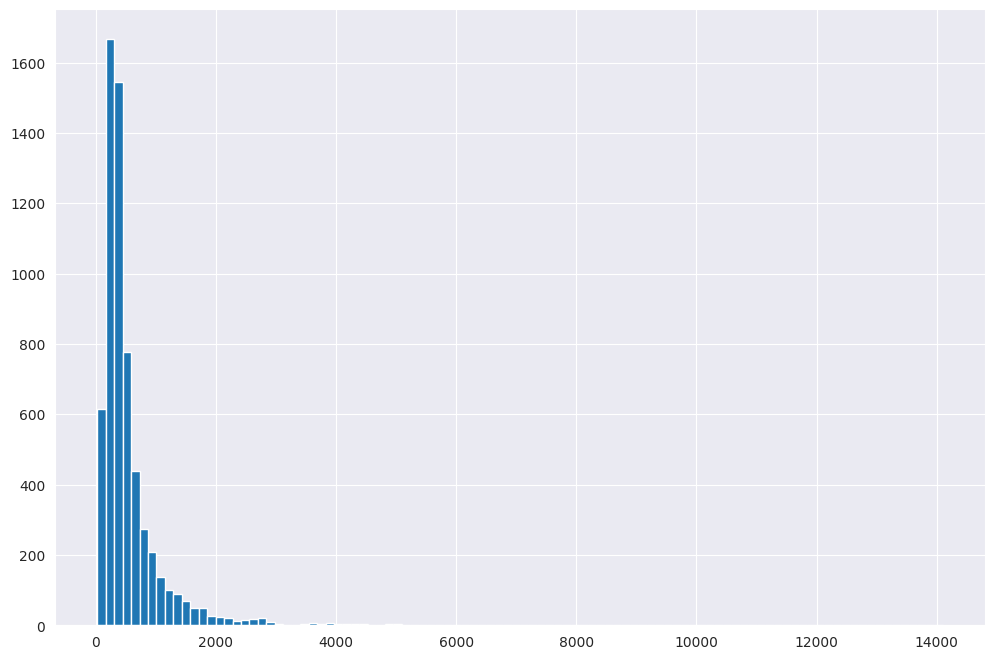

In [ ]:
fig = plt.figure(figsize =(12, 8))
data2.Price.hist(bins = 100)
print()
print("Skewness of price : ",data2.Price.skew())

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df = train

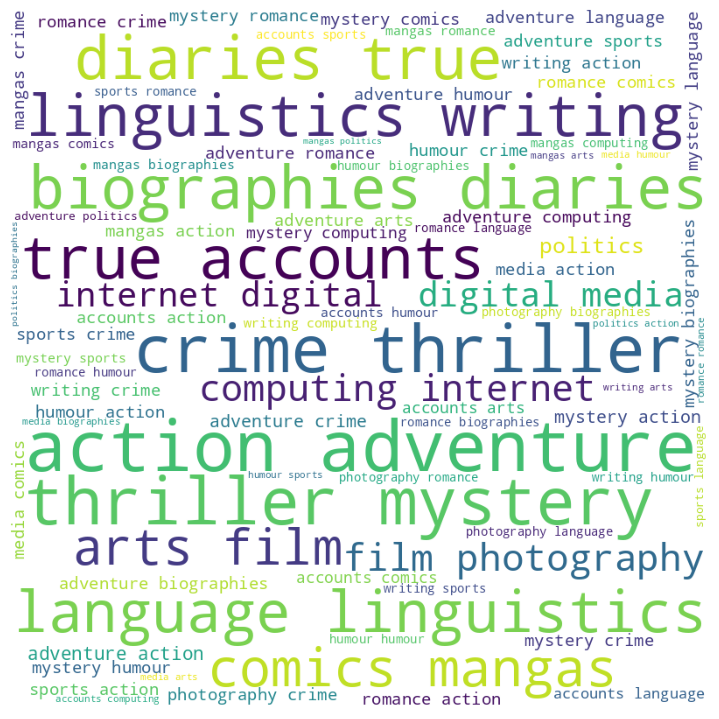

In [ ]:
stopwords = set(STOPWORDS)
comment_words = ''

for val in df.BookCategory:
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

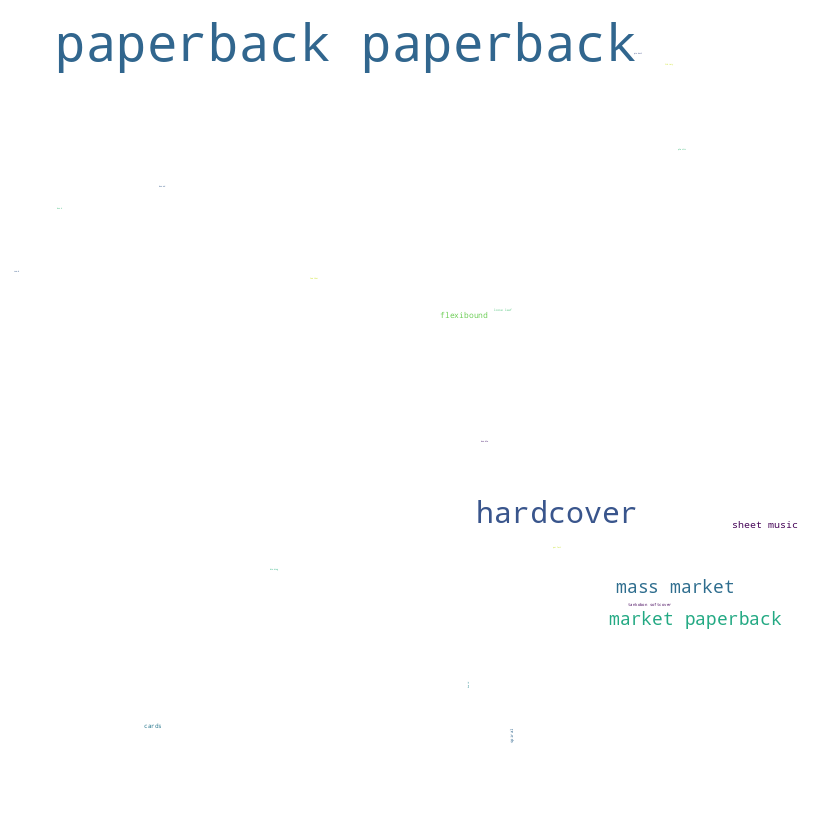

In [ ]:
stopwords = set(STOPWORDS)
comment_words = ''

for val in df.Book_Type:
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 1).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Ratings       6237 non-null   float64
 4   Reviews       6237 non-null   int64  
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
 9   Edition_Year  6237 non-null   int64  
 10  Book_Type     6237 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 536.1+ KB


In [ ]:
data=train
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)


['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'BookCategory', 'Book_Type']
['Ratings', 'Reviews', 'Price', 'Edition_Year']


In [ ]:
object_nunique = list(map(lambda col: data[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('BookCategory', 11),
 ('Book_Type', 15),
 ('Genre', 341),
 ('Edition', 3370),
 ('Author', 3670),
 ('Synopsis', 5548),
 ('Title', 5564)]

In [ ]:
data1= pd.get_dummies(data, columns= ['BookCategory'])
data1.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,Edition_Year,Book_Type,...,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,the prisoner's gold (the hunters 3),chris kuzneski,"paperback,– 10 mar 2016",4.0,8,the hunters return in their third brilliant no...,action & adventure,220.00,2016,Paperback,...,0,0,0,0,0,0,0,0,0,0
1,guru dutt: a tragedy in three acts,arun khopkar,"paperback,– 7 nov 2012",3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,202.93,2012,Paperback,...,0,1,0,0,0,0,0,0,0,0
2,leviathan (penguin classics),thomas hobbes,"paperback,– 25 feb 1982",4.8,6,"""during the time men live without a common pow...",international relation,299.00,1982,Paperback,...,0,0,0,0,0,1,0,0,0,0
3,a pocket full of rye (miss marple),agatha christie,"paperback,– 5 oct 2017",4.1,13,a handful of grain is found in the pocket of a...,contemporary fiction,180.00,2017,Paperback,...,0,0,0,0,1,0,0,0,0,0
4,life 70 years of extraordinary photography,editors of life,"hardcover,– 10 oct 2006",5.0,1,"for seven decades, ""life"" has been thrilling t...",photography,965.62,2006,Hardcover,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
data2 = data1.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)
data2.head()

<ipython-input-114-43e6e6720da6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = data1.drop(['Title','Genre', 'Author','Synopsis','Edition'],1, inplace= False)


,Ratings,Reviews,Price,Edition_Year,Book_Type,BookCategory_action & adventure,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,4.0,8,220.00,2016,Paperback,1,0,0,0,0,0,0,0,0,0,0
1,3.9,14,202.93,2012,Paperback,0,0,1,0,0,0,0,0,0,0,0
2,4.8,6,299.00,1982,Paperback,0,0,0,0,0,0,1,0,0,0,0
3,4.1,13,180.00,2017,Paperback,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1,965.62,2006,Hardcover,0,1,0,0,0,0,0,0,0,0,0


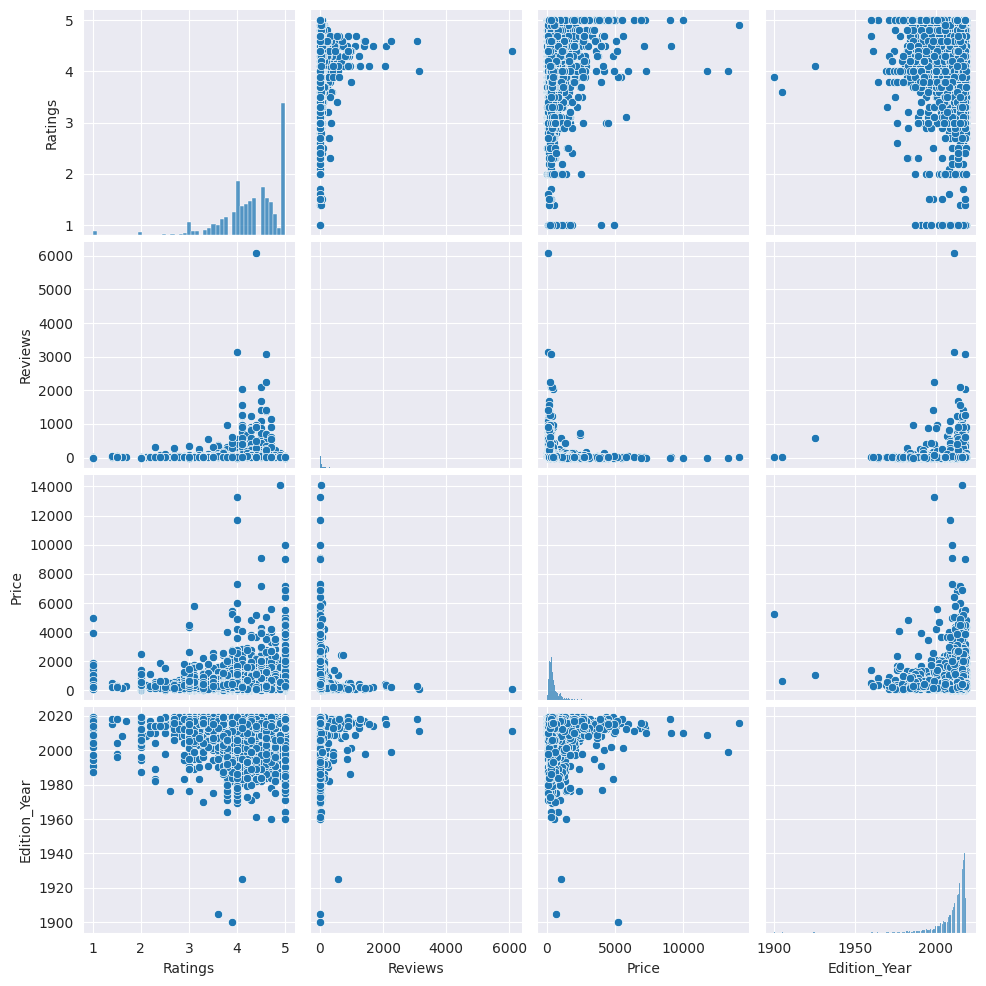

In [ ]:
sns.pairplot(train)
plt.show()

In [ ]:
train.corr()

<ipython-input-116-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Ratings,Reviews,Price,Edition_Year
Ratings,1.000000,-0.000347,0.108373,0.005287
Reviews,-0.000347,1.000000,-0.078063,0.023443
Price,0.108373,-0.078063,1.000000,-0.024184
Edition_Year,0.005287,0.023443,-0.024184,1.000000


<ipython-input-117-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

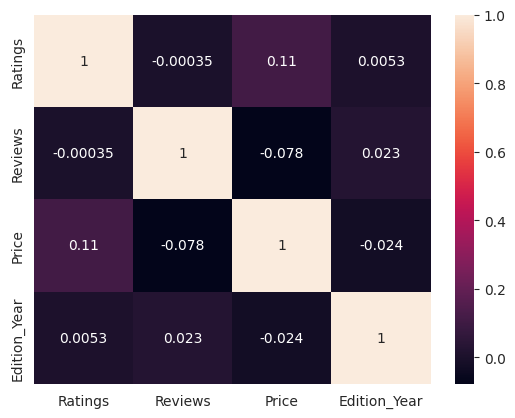

In [ ]:
sns.heatmap(train.corr(),annot=True)

<ipython-input-118-30941c23379f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(data2.drop(['Edition_Year'], 1, inplace=False).corr(),annot=True);
<ipython-input-118-30941c23379f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.drop(['Edition_Year'], 1, inplace=False).corr(),annot=True);


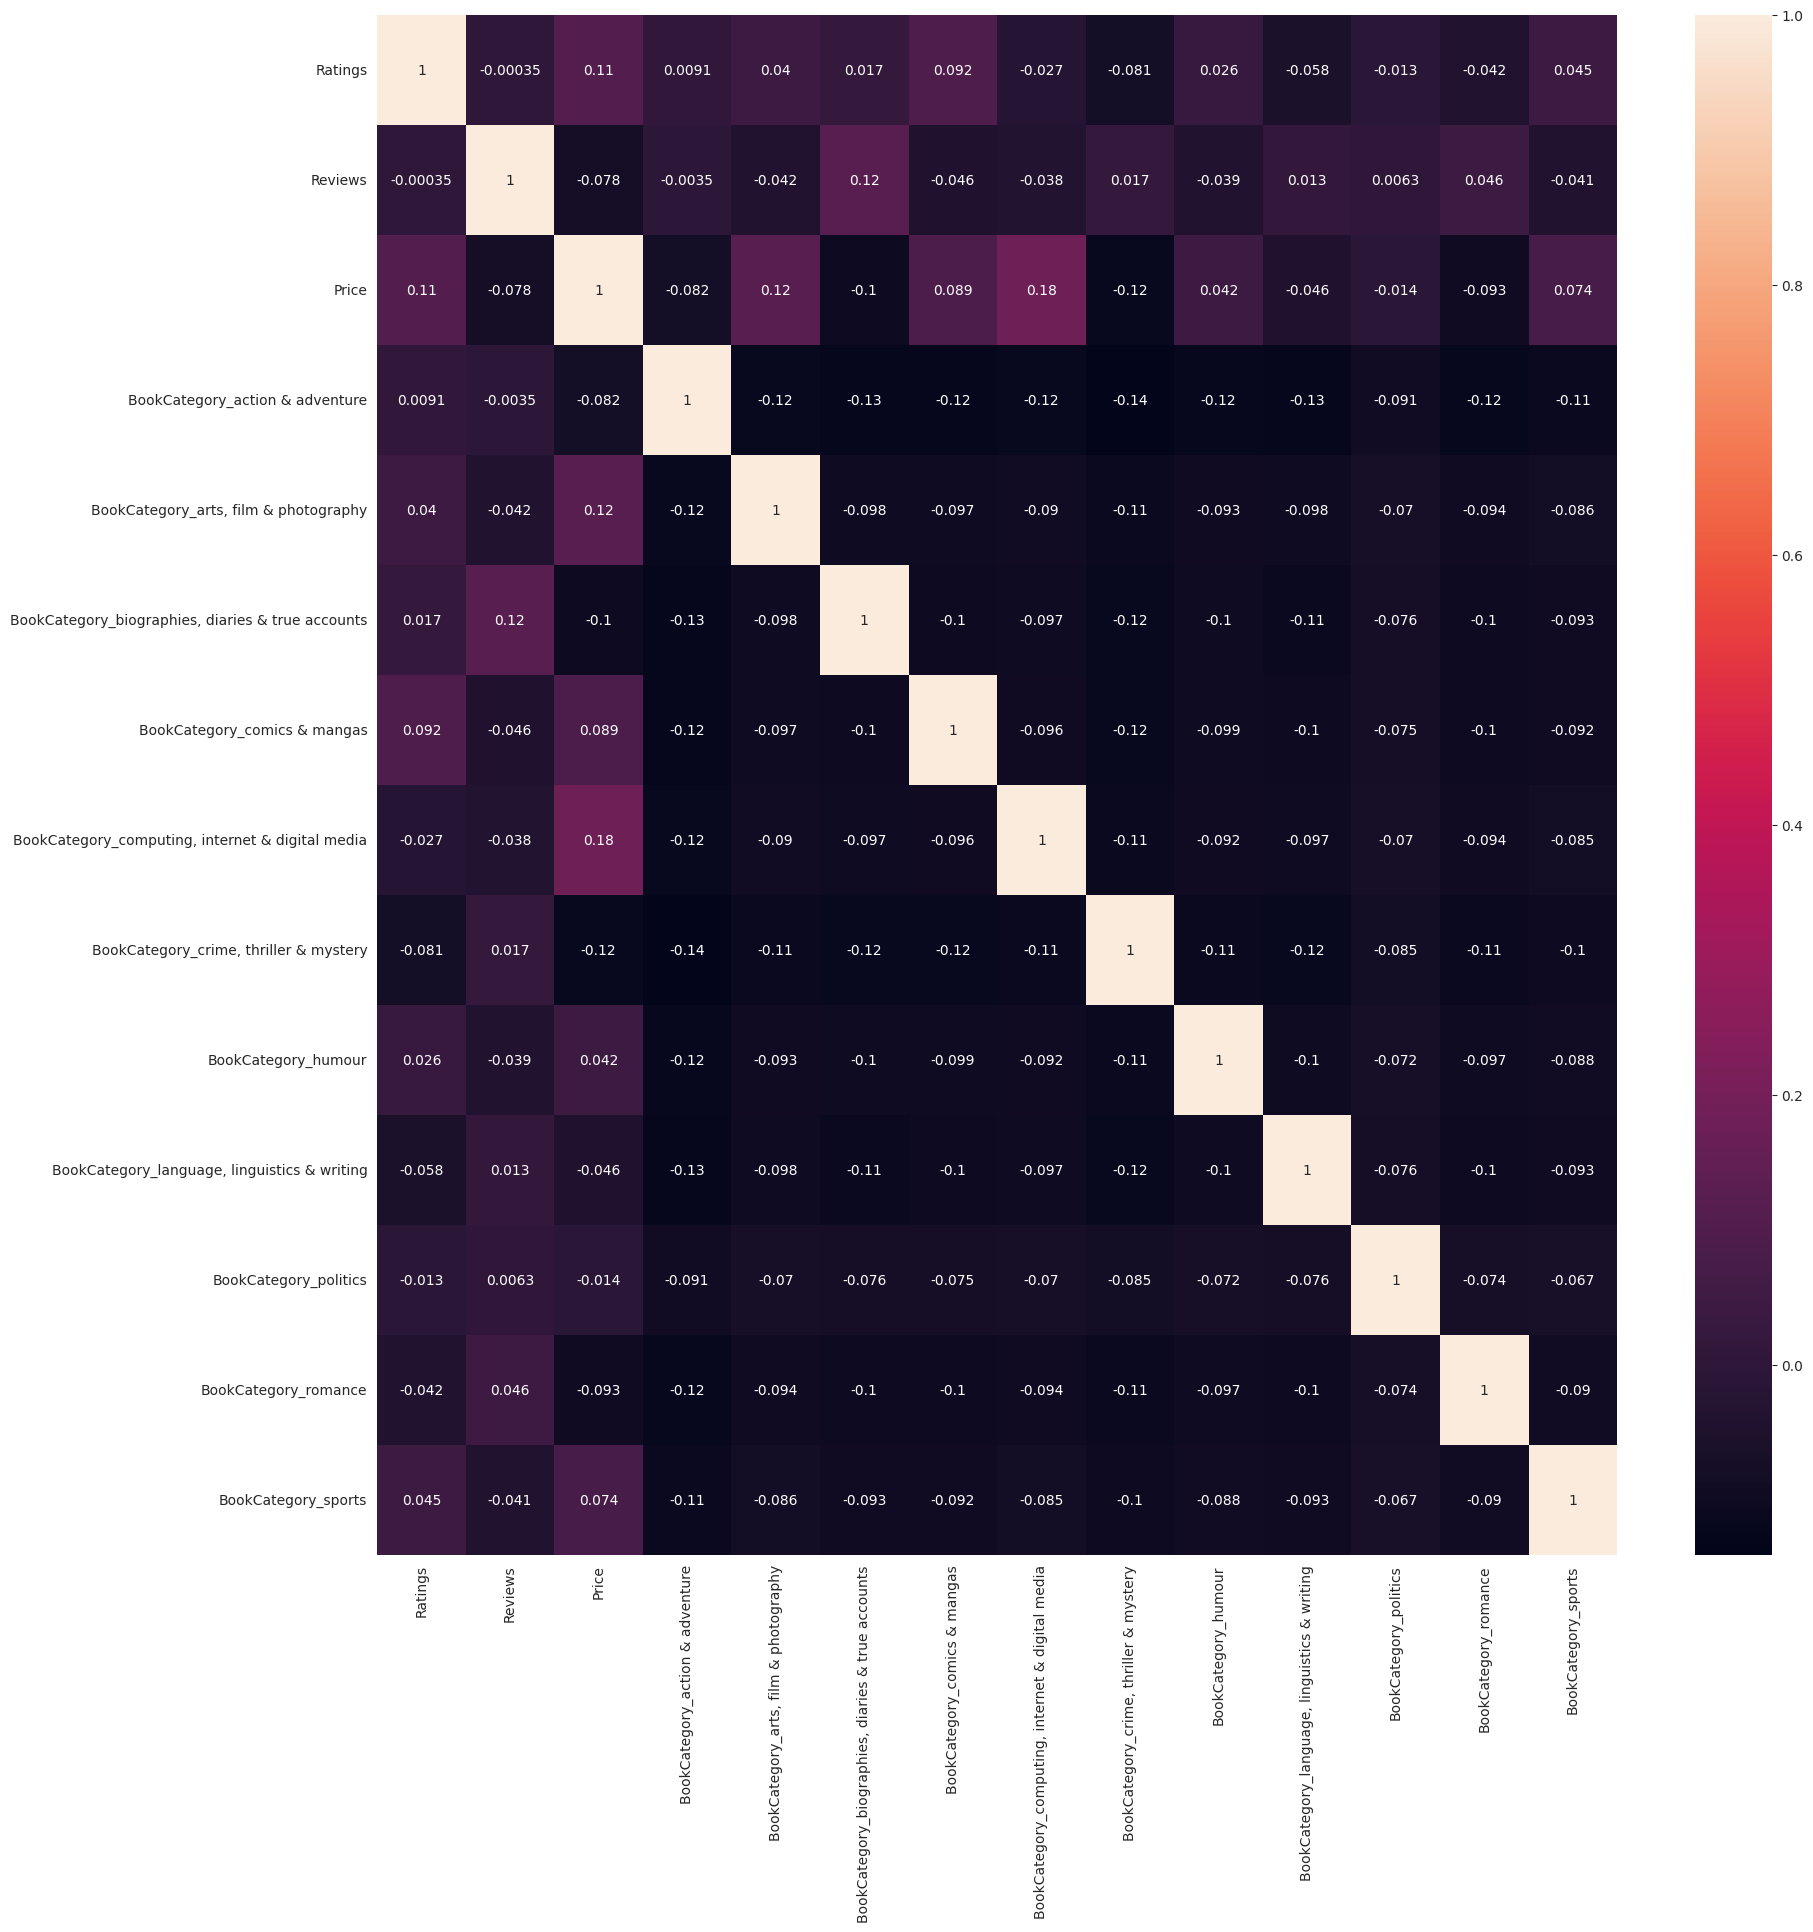

In [ ]:
fig = plt.figure(figsize =(20, 20))
sns.heatmap(data2.drop(['Edition_Year'], 1, inplace=False).corr(),annot=True);

### Model Building

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
from scipy.stats import skew,kurtosis,zscore

In [ ]:
temp = train.copy()
temp[['Reviews']] = power.fit_transform(train[['Reviews']])
temp[['Ratings']] = power.fit_transform(train[['Ratings']])
temp[['Price']] = power.fit_transform(train[['Price']])

In [ ]:
#Function to check the distribution across the numeric data in the dataset
def distribution_check(df,Cols):
    plt.figure(figsize=(25,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

<ipython-input-123-9a5e4e12a258>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(sk)
<ipython-input-123-9a5e4e12a258>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]).set_title(sk)
<ipython-input-123-9a5e4e12a258>:9: UserWarning: 

`distplot` is a deprecated function

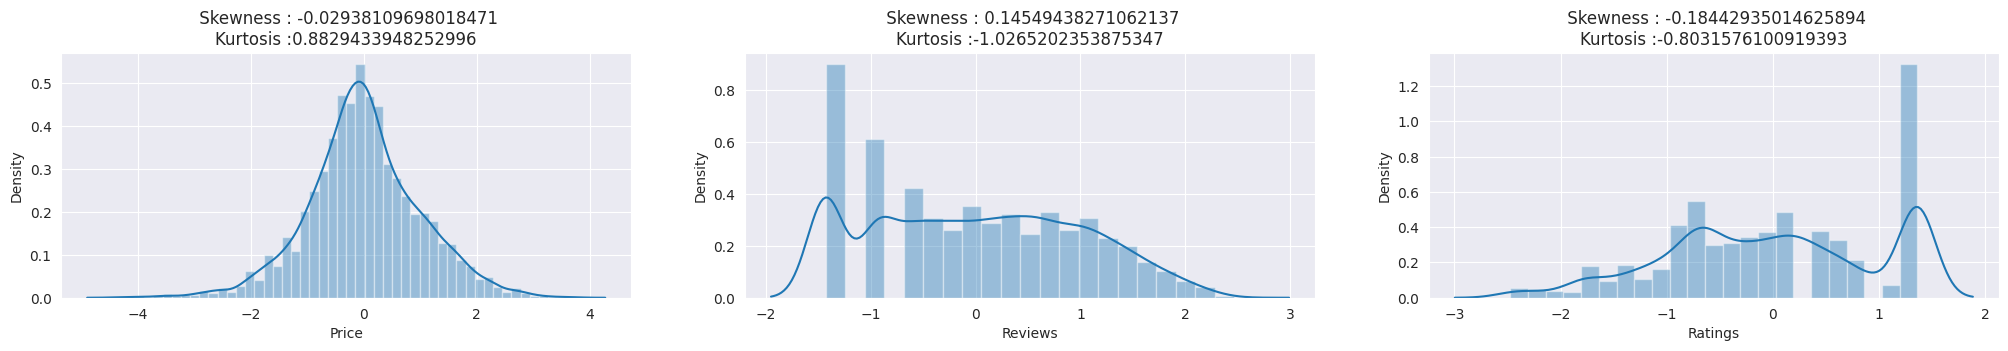

In [ ]:
distribution_check(temp,['Price','Reviews','Ratings']);

In [ ]:
import re
df = data2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
X_train = df.drop(['Price', 'Edition_Year', 'Book_Type'], 1, inplace =False)
y_train = df['Price']

<ipython-input-126-3570d3381161>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = df.drop(['Price', 'Edition_Year', 'Book_Type'], 1, inplace =False)


In [ ]:
X_train

,Ratings,Reviews,BookCategory_actionadventure,BookCategory_artsfilmphotography,BookCategory_biographiesdiariestrueaccounts,BookCategory_comicsmangas,BookCategory_computinginternetdigitalmedia,BookCategory_crimethrillermystery,BookCategory_humour,BookCategory_languagelinguisticswriting,BookCategory_politics,BookCategory_romance,BookCategory_sports
0,4.0,8,1,0,0,0,0,0,0,0,0,0,0
1,3.9,14,0,0,1,0,0,0,0,0,0,0,0
2,4.8,6,0,0,0,0,0,0,1,0,0,0,0
3,4.1,13,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,5.0,2,0,0,0,0,0,0,1,0,0,0,0
6233,3.3,9,0,0,0,0,0,1,0,0,0,0,0
6234,3.8,3,0,0,0,0,0,0,0,0,0,1,0
6235,3.5,4,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

0       220.00
1       202.93
2       299.00
3       180.00
4       965.62
         ...  
6232    322.00
6233    421.00
6234    399.00
6235    319.00
6236    452.00
Name: Price, Length: 6237, dtype: float64

In [ ]:
df_train = lgb.Dataset(X_train,y_train)
df_train

In [ ]:
parameters = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1', 'auc'],
    'learning_rate': 1,
    'num_iterations':10000
}

In [ ]:
rg = lgb.LGBMRegressor(**parameters)

In [ ]:
rg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMRegressor(learning_rate=1, metric=['l1', 'auc'], num_iterations=10000,
              objective='regression', task='train')

In [ ]:
y_pred_train = rg.predict(X_train)

In [ ]:
y_pred_train

array([553.78713496, 202.6285894 , 495.43150433, ..., 399.51721661,
       318.86114389, 344.53109909])

In [ ]:
list(zip(y_train, y_pred_train))

[(220.0, 553.7871349569733),
 (202.93, 202.62858940104707),
 (299.0, 495.43150432776207),
 (180.0, 244.59832149498268),
 (965.62, 997.5651884001984),
 (900.0, 675.2975340827483),
 (224.0, 223.90636180357743),
 (836.0, 836.1574342880867),
 (130.0, 130.0694244199549),
 (695.0, 481.62917442727615),
 (373.0, 372.98825465589744),
 (309.0, 308.9286667505484),
 (379.0, 330.79310089947666),
 (1066.0, 974.1959250355243),
 (381.22, 380.7797881086571),
 (287.0, 974.5733926565993),
 (162.0, 400.4166054962179),
 (587.0, 587.0610196163242),
 (291.0, 291.1254176201868),
 (352.0, 819.1915158296512),
 (339.0, 381.3081449480174),
 (309.0, 738.0305227715787),
 (262.0, 258.8869716933455),
 (607.0, 607.0087895440547),
 (536.0, 298.2887358329968),
 (621.0, 1701.7960578730003),
 (286.98, 286.9715497913192),
 (3779.0, 3778.5972429840745),
 (802.0, 581.984290162686),
 (588.26, 588.1885424234084),
 (340.0, 339.9075783161217),
 (799.0, 749.5164684112159),
 (395.1, 395.3526434858432),
 (225.0, 225.0757208452563),

## Calculating Root Mean Sqaure Error

In [ ]:
print("Train MSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))

Train MSE: 511.44683818314695


In [ ]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred_train))

In [ ]:
normalised_RMSE = RMSE/(max(y_train)- min(y_train))

In [ ]:
normalised_RMSE

0.03633725315688433

Normalised_RMSE = 0.03 (almost close to zero)

In [ ]:
print("Train r2_score:",r2_score(y_train, y_pred_train))

Train r2_score: 0.45067019117849816


### Predicting Prices for Test Data set

In [ ]:
test.head(2)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Edition_Year,Book_Type
0,the complete sherlock holmes: 2 boxes sets,sir arthur conan doyle,"mass market paperback,– 1 oct 1986",4.4,960,a collection of entire body of work of the she...,hort stories,"crime, thriller & mystery",1986,Mass Market Paperback
1,learn docker - fundamentals of docker 18.x: ev...,gabriel n. schenker,"paperback,– import, 26 apr 2018",5.0,1,enhance your software deployment workflow usin...,perating systems,"computing, internet & digital media",2018,Paperback


In [ ]:
data2= pd.get_dummies(test, columns= ['BookCategory'])

In [ ]:
data2.head(2)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Edition_Year,Book_Type,BookCategory_action & adventure,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,the complete sherlock holmes: 2 boxes sets,sir arthur conan doyle,"mass market paperback,– 1 oct 1986",4.4,960,a collection of entire body of work of the she...,hort stories,1986,Mass Market Paperback,0,0,0,0,0,1,0,0,0,0,0
1,learn docker - fundamentals of docker 18.x: ev...,gabriel n. schenker,"paperback,– import, 26 apr 2018",5.0,1,enhance your software deployment workflow usin...,perating systems,2018,Paperback,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data2.drop(['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'Book_Type','Edition_Year', 'Book_Type'], 1, inplace=True)

<ipython-input-144-35407dcc7c80>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2.drop(['Title', 'Author', 'Edition', 'Synopsis', 'Genre', 'Book_Type','Edition_Year', 'Book_Type'], 1, inplace=True)


In [ ]:
data2.head(2)

,Ratings,Reviews,BookCategory_action & adventure,"BookCategory_arts, film & photography","BookCategory_biographies, diaries & true accounts",BookCategory_comics & mangas,"BookCategory_computing, internet & digital media","BookCategory_crime, thriller & mystery",BookCategory_humour,"BookCategory_language, linguistics & writing",BookCategory_politics,BookCategory_romance,BookCategory_sports
0,4.4,960,0,0,0,0,0,1,0,0,0,0,0
1,5.0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y_pred_test = rg.predict(data2)

In [ ]:
pred(y_pred_test)
y_pred_test

array([ 396.00085276, 1579.56623661,  575.97625625, ...,  693.7385743 ,
        156.20452769,  612.28980606])

In [ ]:
dftemp=pd.Series(y_pred_test)
dftemp

test['Price']=dftemp

In [ ]:
test_temp['Price'] = dftemp

In [ ]:
test_temp.to_csv('submission_final.csv')

In [ ]:
test.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Edition_Year,Book_Type,Price
0,the complete sherlock holmes: 2 boxes sets,sir arthur conan doyle,"mass market paperback,– 1 oct 1986",4.4,960,a collection of entire body of work of the she...,hort stories,"crime, thriller & mystery",1986,Mass Market Paperback,396.000853
1,learn docker - fundamentals of docker 18.x: ev...,gabriel n. schenker,"paperback,– import, 26 apr 2018",5.0,1,enhance your software deployment workflow usin...,perating systems,"computing, internet & digital media",2018,Paperback,1579.566237
2,big girl,danielle steel,"paperback,– 17 mar 2011",5.0,4,"'watch out, world. here i come!'\nfor victoria...",romance,romance,2011,Paperback,575.976256
3,think python: how to think like a computer sci...,allen b. downey,"paperback,– 2016",4.1,11,"if you want to learn how to program, working w...",programming & software development,"computing, internet & digital media",2016,Paperback,983.267940
4,oxford word skills: advanced - idioms & phrasa...,redman gairns,"paperback,– 26 dec 2011",4.4,9,"learn and practise the verbs, prepositions and...",linguistics,"language, linguistics & writing",2011,Paperback,497.658560


In [ ]:
temp = test.copy()
# saving the dataframe
temp.to_csv('submission1.csv')

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

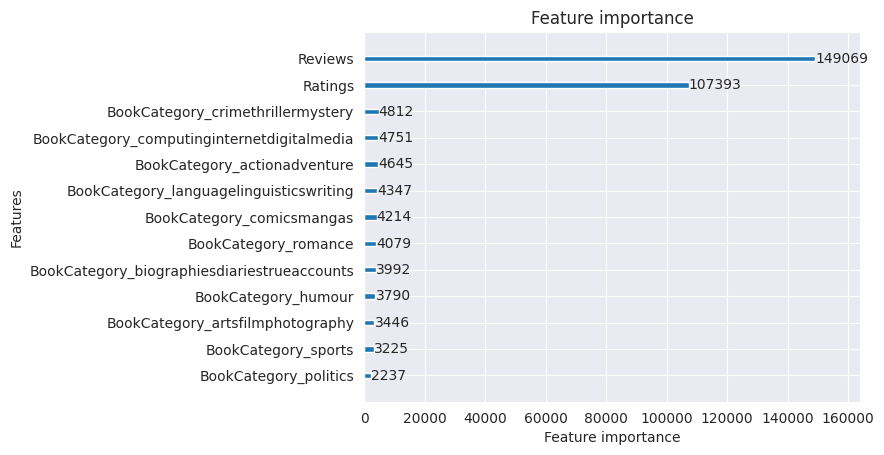

In [ ]:
lgb.plot_importance(rg)

<Axes: >

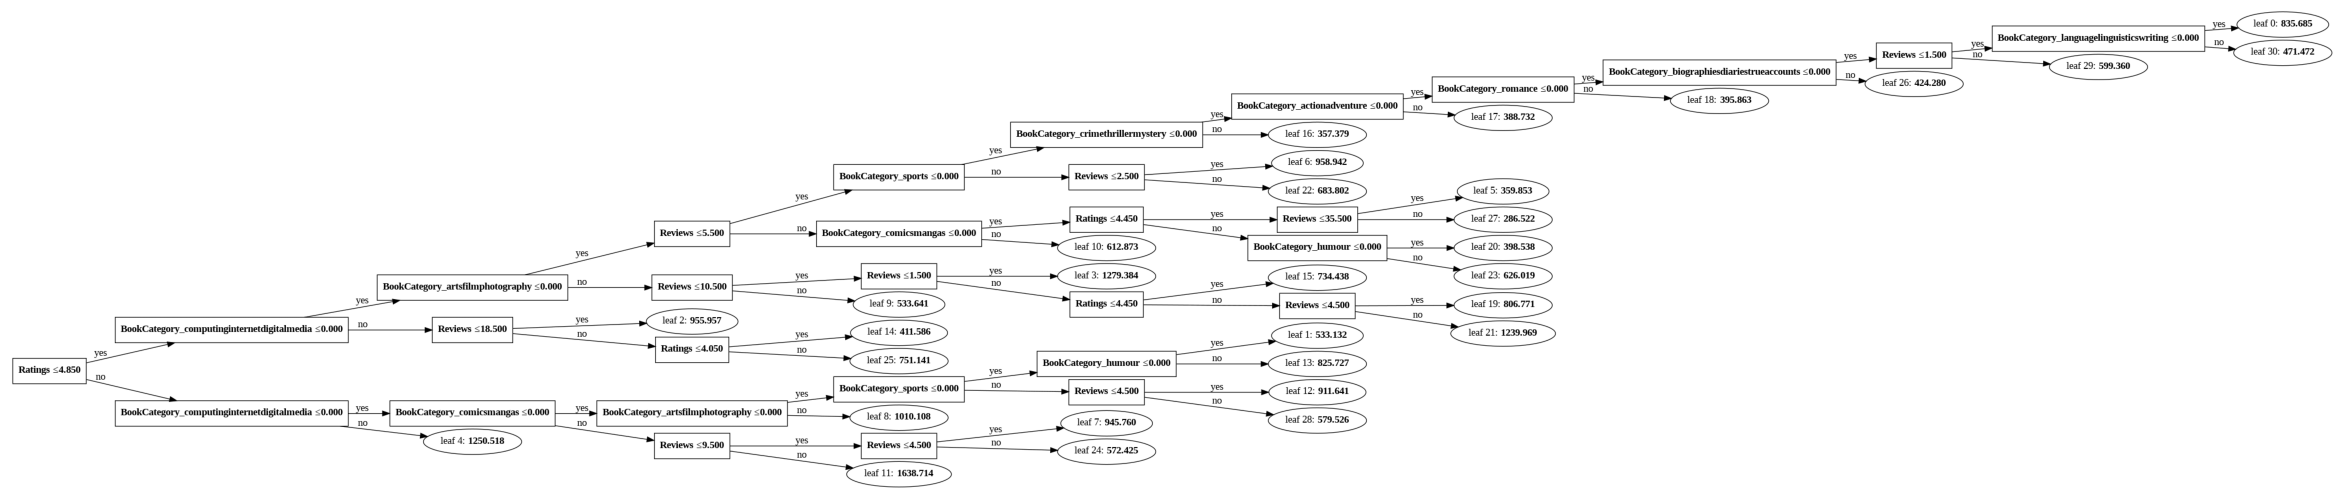

In [ ]:
lgb.plot_tree(rg,figsize=(30,40))

In [ ]:
rg.predict([[900, 4.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

array([748.07423974])